# Figure 8B

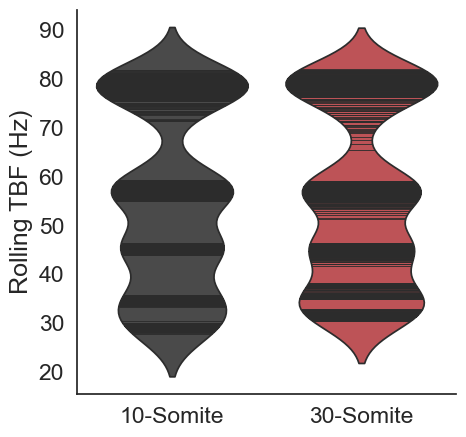

In [1]:
import pandas as pd
from FileToDFTools import read_tail_files, create_tail_dataframe
import seaborn as sns
sns.set_theme(font_scale=1.5)
sns.set_style(style="white")

ten_freq_files, ten_move_files = read_tail_files("10 Somite SIFx5")
thirty_freq_files, thirty_move_files = read_tail_files("30 Somite SIFx5")
# Combine all files
ten_freq_data = create_tail_dataframe(ten_freq_files, '10-Somite', 'Rolling TBF')
thirty_freq_data =create_tail_dataframe(thirty_freq_files, '30-Somite', 'Rolling TBF')

freq_data = pd.concat([ten_freq_data, thirty_freq_data])

g = sns.catplot(data=freq_data, x="Group", y="Rolling TBF", kind="violin", inner="stick", hue="Group",
                palette={"10-Somite": "#4A4A4A", "30-Somite": "#CE4247"}, legend=False )
g.set(xlabel=None, ylabel="Rolling TBF (Hz)")


In [4]:
from scipy.stats import mannwhitneyu


u_stat, p_val = mannwhitneyu(thirty_freq_data["Rolling TBF"], ten_freq_data["Rolling TBF"])
print (u_stat)
print(p_val)

851170.0
0.09222468504899065


# Figure 8C

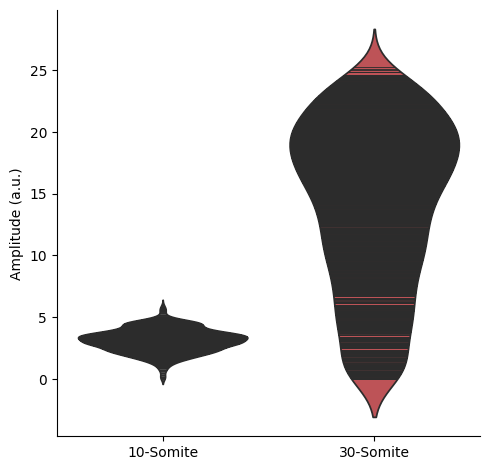

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from FileToDFTools import read_tail_files, create_tail_dataframe
from scipy.signal import find_peaks

_, ten_move_files = read_tail_files("10 Somite SIFx5")
_, thirty_move_files = read_tail_files("30 Somite SIFx5")
# Combine all files
ten_move_data = create_tail_dataframe(ten_move_files, '10-Somite', 'Y-Axis')
thirty_move_data =create_tail_dataframe(thirty_move_files, '30-Somite', 'Y-Axis')

ten_distances = ten_move_data["Y-Axis"]
thirty_distances = thirty_move_data["Y-Axis"]
# Find peaks
ten_peaks, _ = find_peaks(ten_distances)
thirty_peaks, _ = find_peaks(thirty_distances)
# Extract peak values
ten_peak_values = np.array(ten_distances)[ten_peaks]
ten_peak_values = ten_peak_values[(-0.01 > ten_peak_values) | (ten_peak_values > 0.01)]

thirty_peak_values = np.array(thirty_distances)[ten_peaks]
thirty_peak_values = thirty_peak_values[(-0.01 > thirty_peak_values) | (thirty_peak_values > 0.01)]

ten_df = pd.DataFrame({"Y-Axis":ten_peak_values})
ten_df['Group'] = "10-Somite"
thirty_df = pd.DataFrame({"Y-Axis":thirty_peak_values})
thirty_df['Group'] = "30-Somite"
move_data = pd.concat([ten_df, thirty_df])
move_data['Y-Axis'] = move_data['Y-Axis'].abs()

g = sns.catplot(data=move_data, x="Group", y="Y-Axis", kind="violin", inner="stick", hue="Group",
                palette={"10-Somite": "#4A4A4A", "30-Somite": "#CE4247"}, legend=False )
g.set(xlabel=None, ylabel="Amplitude (a.u.)")


In [6]:
from scipy.stats import mannwhitneyu


u_stat, p_val = mannwhitneyu(thirty_peak_values, ten_peak_values)
print (u_stat)
print(p_val)

1717494.0
4.424537377344426e-22
